In [2]:
import os
os.getcwd() 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d


In [3]:
os.chdir('C:\\Users\\Catren-PC\\Desktop\\DSI\\team_project\\')
os.getcwd() 

'C:\\Users\\Catren-PC\\Desktop\\DSI\\team_project'

In [5]:
stroke = pd.read_csv('.\\data\\raw\\healthcare-dataset-stroke-data.csv')

In [6]:
stroke.info()
stroke.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#Data Preprocessing

#Encode the categorical vars
stroke_dummies = pd.get_dummies(stroke, columns=['gender', 'work_type', 'Residence_type','smoking_status'], drop_first=True)

stroke_dummies.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,Yes,228.69,36.6,1,True,False,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,Yes,202.21,NaN,1,False,False,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,Yes,105.92,32.5,1,True,False,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,Yes,171.23,34.4,1,False,False,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,Yes,174.12,24.0,1,False,False,False,False,True,False,False,False,True,False


In [8]:
#Check unique values
unique_values = stroke[['gender', 'work_type', 'Residence_type', 'ever_married', 'smoking_status']].apply(lambda x: x.value_counts()) 
print(unique_values)

#1 Other gender, 22 Never worked; consider removing or grouping with another category

                 gender  work_type  Residence_type  ever_married  \
Female           2994.0        NaN             NaN           NaN   
Govt_job            NaN      657.0             NaN           NaN   
Male             2115.0        NaN             NaN           NaN   
Never_worked        NaN       22.0             NaN           NaN   
No                  NaN        NaN             NaN        1757.0   
Other               1.0        NaN             NaN           NaN   
Private             NaN     2925.0             NaN           NaN   
Rural               NaN        NaN          2514.0           NaN   
Self-employed       NaN      819.0             NaN           NaN   
Unknown             NaN        NaN             NaN           NaN   
Urban               NaN        NaN          2596.0           NaN   
Yes                 NaN        NaN             NaN        3353.0   
children            NaN      687.0             NaN           NaN   
formerly smoked     NaN        NaN             N

In [26]:
#Change ever_married into 1 and 0s
stroke_dummies['ever_married'] = stroke_dummies['ever_married'].map({'Yes': 1, 'No': 0})
stroke_dummies['ever_married'].value_counts()

ever_married
1    3353
0    1757
Name: count, dtype: int64

In [27]:
#Check target variable
print(stroke['stroke'].value_counts())

#Due to imbalance (most are non-stroke cases), KNN may not be the best to use

stroke
0    4861
1     249
Name: count, dtype: int64


In [28]:
#Impute BMI with mean
from sklearn.impute import SimpleImputer

# Initialize the imputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing BMI values with the mean of the column
stroke_dummies['bmi'] = imputer.fit_transform(stroke_dummies[['bmi']])

# Display the DataFrame after imputation
print(stroke_dummies.head(), stroke_dummies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   avg_glucose_level               5110 non-null   float64
 6   bmi                             5110 non-null   float64
 7   stroke                          5110 non-null   int64  
 8   gender_Male                     5110 non-null   bool   
 9   gender_Other                    5110 non-null   bool   
 10  work_type_Never_worked          5110 non-null   bool   
 11  work_type_Private               5110 non-null   bool   
 12  work_type_Self-employed         51

In [29]:
#Scale the continous vars 
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['age', 'avg_glucose_level', 'bmi']

scaler= StandardScaler()

stroke_scaled = stroke_dummies.copy()

stroke_scaled[columns_to_scale] = scaler.fit_transform(stroke_dummies[columns_to_scale])

stroke_scaled.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,0,1,1,2.706375,1.001234e+00,1,True,False,False,True,False,False,True,True,False,False
1,51676,0.786070,0,0,1,2.121559,4.615554e-16,1,False,False,False,False,True,False,False,False,True,False
2,31112,1.626390,0,1,1,-0.005028,4.685773e-01,1,True,False,False,True,False,False,False,False,True,False
3,60182,0.255342,0,0,1,1.437358,7.154182e-01,1,False,False,False,True,False,False,True,False,False,True
4,1665,1.582163,1,0,1,1.501184,-6.357112e-01,1,False,False,False,False,True,False,False,False,True,False


In [ ]:
#Impute BMI with KNN imputer
#from sklearn.impute import KNNImputer

# Initialize KNNImputer (you can adjust the number of neighbors)
#imputer = KNNImputer(n_neighbors=5)

# Impute the missing values in the dataset
#stroke_scaled['bmi'] = imputer.fit_transform(stroke_scaled[['age', 'gender', 'ever_married', 'heart_disease', 'avg_glucose_level', 'smoking_status', 'bmi']])[:, -1]

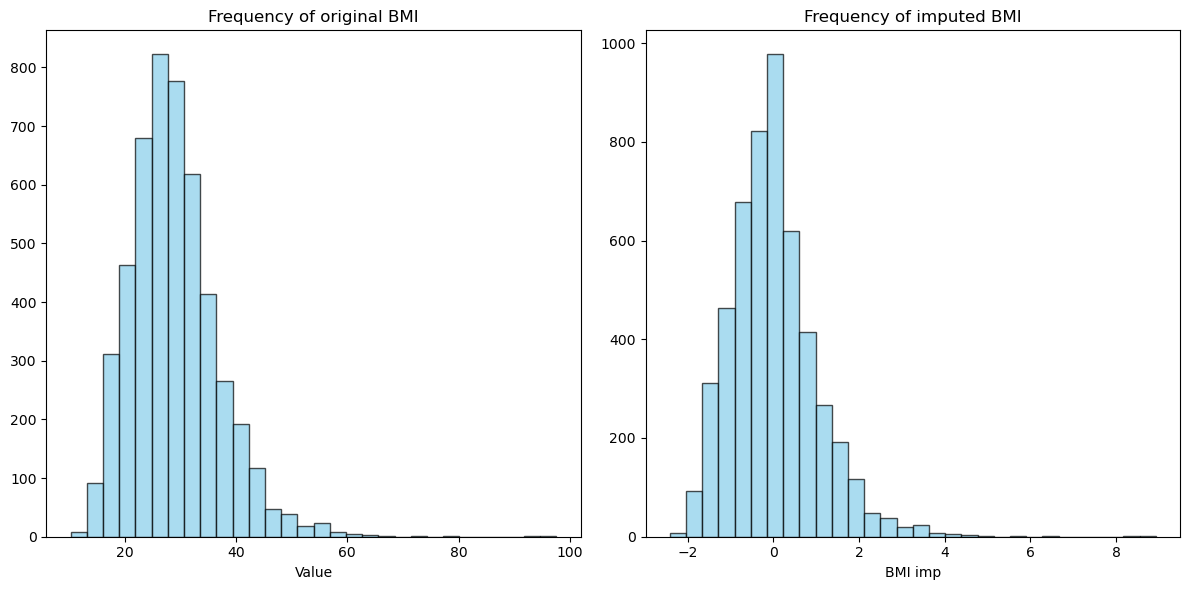

In [10]:
#View diff between original and imputed BMI
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(stroke['bmi'], bins=30, alpha=0.7, edgecolor='black', color='skyblue')
axes[0].set_title('Frequency of original BMI')
axes[0].set_xlabel('Value')

axes[1].hist(stroke_scaled['bmi'], bins=30, alpha=0.7, edgecolor='black', color='skyblue')
axes[1].set_title('Frequency of imputed BMI')
axes[1].set_xlabel('BMI imp')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#calculate VIF
HTN= stroke_scaled[["heart_disease", "hypertension", "avg_glucose_level" ]]

vif_data= pd.DataFrame()
vif_data["feature"] = HTN.columns
vif_data["VIF"] = [variance_inflation_factor(HTN.values, i)
                for i in range(HTN.shape[1])]

vif_data

#low VIFs so low risk of multicollinearity

,feature,VIF
0,heart_disease,1.025413
1,avg_glucose_level,1.025413


In [30]:
#Test out Gradient Boosting (without SMOTE)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


X = stroke_scaled.drop('stroke', axis=1)  # Features
y = stroke_scaled['stroke']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Can try out diff values for the following parameters (keep random_state the same)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm.fit(X_train, y_train) 

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, gbm.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# False positives: 1
# False negatives: 62 <- we want this to be 0
# True positives: 0 <- we want to maximize this

#Poor performance due to imbalanced dataset

Accuracy:  0.9383561643835616
ROC AUC:  0.8290406586021506
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[959   1]
 [ 62   0]]


In [35]:
#Hyperparameter Tuning of the GradientBoostingClassifier using GridSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
 
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Shrinkage rate to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting each base learner
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when splitting a node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_gbm = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_gbm.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, best_gbm.predict_proba(X_test)[:, 1]))

KeyboardInterrupt: 

In [41]:
#Can try out diff values for the following parameters (keep random_state the same)
gbm2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, max_depth=50, random_state=42)

# Train the model
gbm2.fit(X_train, y_train) 

GradientBoostingClassifier(learning_rate=0.01, max_depth=50, n_estimators=1000,
                           random_state=42)

In [ ]:
# Make predictions
y_pred2 = gbm2.predict(X_test)

# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred2))
print("ROC AUC: ", roc_auc_score(y_test, gbm2.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

# False positives: 31
# False negatives: 55 <- we want this to be 0
# True positives: 7 <- we want to maximize this

#recall is 11%

Accuracy:  0.9158512720156555
ROC AUC:  0.5183131720430108
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.18      0.11      0.14        62

    accuracy                           0.92      1022
   macro avg       0.56      0.54      0.55      1022
weighted avg       0.90      0.92      0.91      1022

Confusion Matrix:
 [[929  31]
 [ 55   7]]


In [ ]:
import numpy as np
# Calculate sample weights (inverse of class frequencies)
class_counts = y_train.value_counts()
class_weights = {class_label: 1/count for class_label, count in class_counts.items()}  # Example: giving more weight to class 1 (minority class)
print(class_weights)

sample_weights = np.array([class_weights[label] for label in y_train])
print(sample_weights)

{0: 0.0002563445270443476, 1: 0.0053475935828877}
[0.00025634 0.00025634 0.00025634 ... 0.00025634 0.00025634 0.00025634]


In [ ]:
gbm3 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, max_depth=100, 
                                  min_samples_split=10, subsample= 0.9, max_features='log',
                                  random_state=42)

gbm3.fit(X_train, y_train, sample_weight=sample_weights)

GradientBoostingClassifier(learning_rate=0.01, max_depth=100,
                           max_features='sqrt', min_samples_split=10,
                           n_estimators=1000, random_state=42, subsample=0.9)

In [51]:
# Get the predicted probabilities for the positive class
y_prob = gbm3.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Adjust the threshold (e.g., 0.3 instead of 0.5)
threshold = 0.01
y_pred3_adjusted = (y_prob > threshold).astype(int)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred3_adjusted))

Confusion Matrix:
 [[892  68]
 [ 45  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.20      0.27      0.23        62

    accuracy                           0.89      1022
   macro avg       0.58      0.60      0.59      1022
weighted avg       0.91      0.89      0.90      1022

